# Exercise 5 - Hannafalch_nastby


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas DataFrame

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
data = pd.read_csv('data_000637.txt')

def sliceDF(N):
    return data[:N]

2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
BX = data['BX_COUNTER']
maxBX = np.max(BX) + 1

3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
absTime = data['TDC_MEAS']*(25/30) + data['BX_COUNTER']*25 + data['ORBIT_CNT']*25*maxBX
data['ABSOLUTE_TIME'] = absTime

d = sliceDF(10000)
d

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.447457e+14
9996,1,0,60,3869200267,701,5,3.447457e+14
9997,1,0,59,3869200267,707,23,3.447457e+14
9998,1,0,63,3869200267,706,15,3.447457e+14


4. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [38]:
dur = data['ABSOLUTE_TIME'].iloc[-1] - data['ABSOLUTE_TIME'].iloc[0]
print(pd.Timedelta(f"{dur}ns"))
print(dur)

0 days 00:00:00.980416
980416093.3125


5. Use the .groupby() method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
occ = data.groupby('TDC_CHANNEL').size().sort_values()
print('The channels with the most noise is:')
occ[-3:]


The channels with the most noise is:


TDC_CHANNEL
63      64642
64      66020
139    108059
dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
orb = set(data['ORBIT_CNT'])
lenOrb = len(orb)
print('The number of non-empty orbits are: ', lenOrb)
print('The orbits are: ')
print(orb)


The number of non-empty orbits are:  11001
The orbits are: 
{3869200167, 3869200168, 3869200169, 3869200170, 3869200171, 3869200172, 3869200173, 3869200174, 3869200175, 3869200176, 3869200177, 3869200178, 3869200179, 3869200180, 3869200181, 3869200182, 3869200183, 3869200184, 3869200185, 3869200186, 3869200187, 3869200188, 3869200189, 3869200190, 3869200191, 3869200192, 3869200193, 3869200194, 3869200195, 3869200196, 3869200197, 3869200198, 3869200199, 3869200200, 3869200201, 3869200202, 3869200203, 3869200204, 3869200205, 3869200206, 3869200207, 3869200208, 3869200209, 3869200210, 3869200211, 3869200212, 3869200213, 3869200214, 3869200215, 3869200216, 3869200217, 3869200218, 3869200219, 3869200220, 3869200221, 3869200222, 3869200223, 3869200224, 3869200225, 3869200226, 3869200227, 3869200228, 3869200229, 3869200230, 3869200231, 3869200232, 3869200233, 3869200234, 3869200235, 3869200236, 3869200237, 3869200238, 3869200239, 3869200240, 3869200241, 3869200242, 3869200243, 3869200244, 386

7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
ordch130 = set([data['ORBIT_CNT'][i] for i in range(len(data)) if data['TDC_CHANNEL'][i] == 139])

In [10]:
print(len(ordch130))

10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

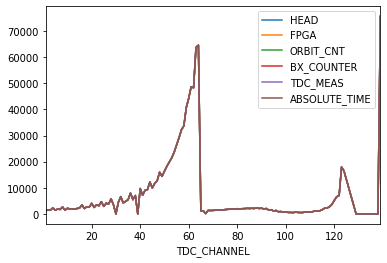

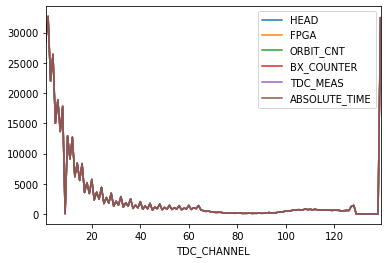

In [36]:
series0 = data[data["FPGA"] == 0]
series1 = data[data["FPGA"] == 1]


count0 = series0.groupby('TDC_CHANNEL').count().plot()
count1 = series1.groupby('TDC_CHANNEL').count().plot()

#plt.plot(count0, )